<a href="https://colab.research.google.com/github/yangpimpollo/temp2/blob/main/ExpoRegre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar Datos**

In [12]:
data1 <- read.csv("data2.csv", sep = ";")
head(data1)

,costs,revenue
,<dbl>,<dbl>
1,108.05,900
2,123.98,918
3,154.07,1080
4,177.38,1350
5,189.65,1791
6,169.10,1800


In [ ]:
dim(data1)

[1] 50  2

**Paquetes Principales**

In [4]:
install.packages('lmtest')
library(lmtest)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




**Modelo**

In [5]:
model <- lm(revenue ~ costs, data = data1)

data1$residuals <- residuals(model)
data1$fitted <- fitted(model)

In [24]:
summary.lm(model)


Call:
lm(formula = revenue ~ costs, data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1717.19  -404.12   -88.42   386.88  1560.67 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -220.991    250.058  -0.884    0.381    
costs         11.411      0.463  24.646   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 733.2 on 48 degrees of freedom
Multiple R-squared:  0.9268,	Adjusted R-squared:  0.9252 
F-statistic: 607.4 on 1 and 48 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


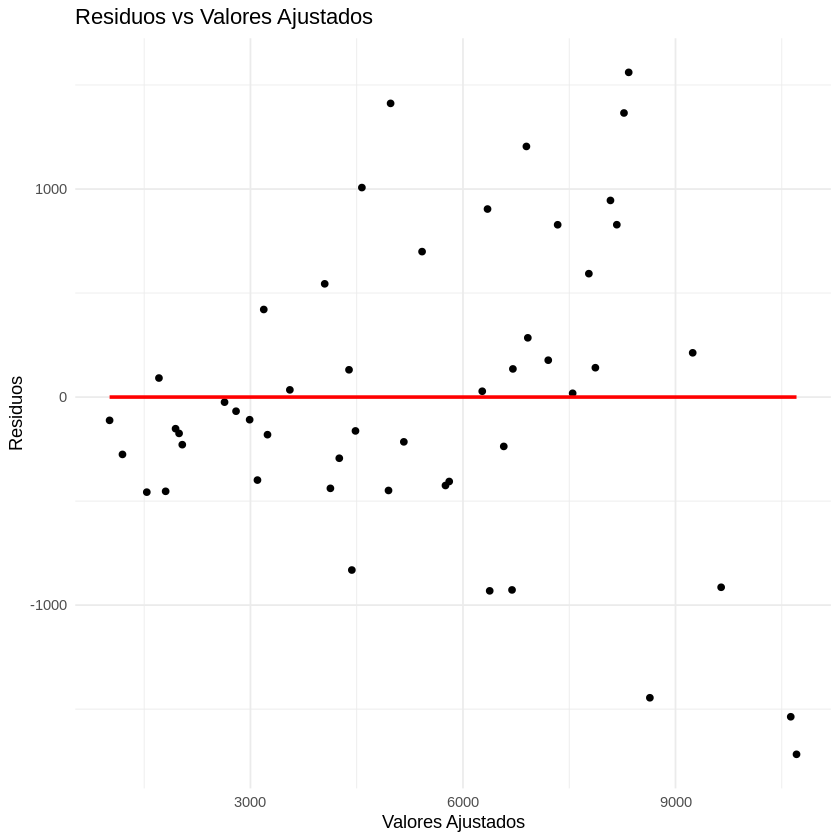

In [6]:
ggplot(data1, aes(x = fitted, y = residuals)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Residuos vs Valores Ajustados",
       x = "Valores Ajustados",
       y = "Residuos") +
  theme_minimal()

**Test de Goldfeld y Quandt**

In [ ]:
gqtest(model, order.by = ~ costs, data = data1, fraction = 10)


	Goldfeld-Quandt test

data:  model
GQ = 8.5916, df1 = 18, df2 = 18, p-value = 1.614e-05
alternative hypothesis: variance increases from segment 1 to 2


**Conclusión:**
*para un α = 5% el p-valor es inferior a 0.05 podemos concluir que existe heterocedasticidad*


**Transformando nuestro Datos**

In [13]:
data1$logcosts <- log(data1$costs, base = 10)
data1$logrevenue <- log(data1$revenue, base = 10)
head(data1)

,costs,revenue,logcosts,logrevenue
,<dbl>,<dbl>,<dbl>,<dbl>
1,108.05,900,2.033625,2.954243
2,123.98,918,2.093352,2.962843
3,154.07,1080,2.187718,3.033424
4,177.38,1350,2.248905,3.130334
5,189.65,1791,2.277953,3.253096
6,169.10,1800,2.228144,3.255273


In [15]:
modelT1 <- lm(logrevenue ~ logcosts, data = data1)
modelT1


Call:
lm(formula = logrevenue ~ logcosts, data = data1)

Coefficients:
(Intercept)     logcosts  
     0.6136       1.1553  


In [16]:
summary.lm(modelT1)


Call:
lm(formula = logrevenue ~ logcosts, data = data1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.107663 -0.028526  0.002788  0.031725  0.120343 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.61355    0.08599   7.135 4.56e-09 ***
logcosts     1.15533    0.03250  35.548  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05478 on 48 degrees of freedom
Multiple R-squared:  0.9634,	Adjusted R-squared:  0.9626 
F-statistic:  1264 on 1 and 48 DF,  p-value: < 2.2e-16


In [17]:
head(data1)

,costs,revenue,logcosts,logrevenue
,<dbl>,<dbl>,<dbl>,<dbl>
1,108.05,900,2.033625,2.954243
2,123.98,918,2.093352,2.962843
3,154.07,1080,2.187718,3.033424
4,177.38,1350,2.248905,3.130334
5,189.65,1791,2.277953,3.253096
6,169.10,1800,2.228144,3.255273


`geom_smooth()` using formula = 'y ~ x'


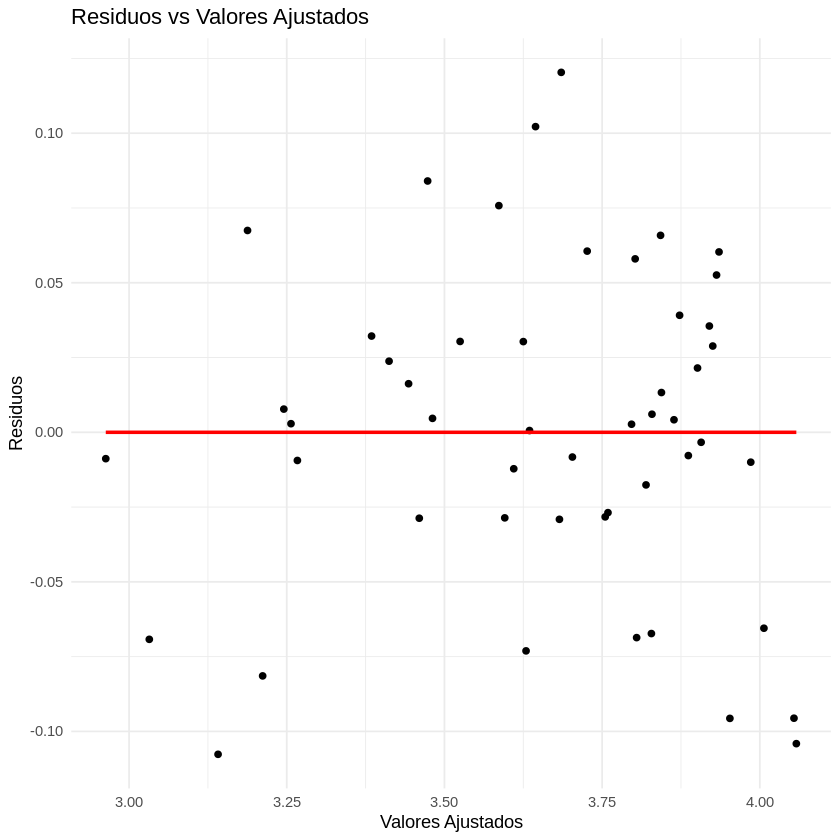

In [18]:
data1$residualsT1 <- residuals(modelT1)
data1$fittedT1 <- fitted(modelT1)

ggplot(data1, aes(x = fittedT1, y = residualsT1)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Residuos vs Valores Ajustados",
       x = "Valores Ajustados",
       y = "Residuos") +
  theme_minimal()

In [26]:
gqtest(modelT1, order.by = ~ logcosts, data = data1, fraction = 10)


	Goldfeld-Quandt test

data:  modelT1
GQ = 1.0203, df1 = 18, df2 = 18, p-value = 0.4832
alternative hypothesis: variance increases from segment 1 to 2


**Conclusión:**
*para un α = 5% el p-valor es superior a 0.05 podemos concluir que corregimos la heterocedasticidad*

In [20]:
head(data1)

,costs,revenue,logcosts,logrevenue,residualsT1,fittedT1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,108.05,900,2.033625,2.954243,-0.008816084,2.963059
2,123.98,918,2.093352,2.962843,-0.069220131,3.032063
3,154.07,1080,2.187718,3.033424,-0.107663357,3.141087
4,177.38,1350,2.248905,3.130334,-0.081444015,3.211778
5,189.65,1791,2.277953,3.253096,0.007757580,3.245338
6,169.10,1800,2.228144,3.255273,0.067480579,3.187792


In [21]:
data1$sqrtcosts <- sqrt(data1$costs)
data1$sqrtrevenue <- sqrt(data1$revenue)
head(data1)

,costs,revenue,logcosts,logrevenue,residualsT1,fittedT1,sqrtcosts,sqrtrevenue
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,108.05,900,2.033625,2.954243,-0.008816084,2.963059,10.39471,30.00000
2,123.98,918,2.093352,2.962843,-0.069220131,3.032063,11.13463,30.29851
3,154.07,1080,2.187718,3.033424,-0.107663357,3.141087,12.41249,32.86335
4,177.38,1350,2.248905,3.130334,-0.081444015,3.211778,13.31841,36.74235
5,189.65,1791,2.277953,3.253096,0.007757580,3.245338,13.77135,42.32021
6,169.10,1800,2.228144,3.255273,0.067480579,3.187792,13.00385,42.42641


In [22]:
modelT2 <- lm(sqrtrevenue ~ sqrtcosts, data = data1)
modelT2


Call:
lm(formula = sqrtrevenue ~ sqrtcosts, data = data1)

Coefficients:
(Intercept)    sqrtcosts  
     -6.757        3.600  


In [23]:
summary.lm(modelT2)


Call:
lm(formula = sqrtrevenue ~ sqrtcosts, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8261 -2.6662 -0.0686  2.8017  9.8550 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.7567     2.6445  -2.555   0.0138 *  
sqrtcosts     3.5997     0.1193  30.177   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.516 on 48 degrees of freedom
Multiple R-squared:  0.9499,	Adjusted R-squared:  0.9489 
F-statistic: 910.7 on 1 and 48 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


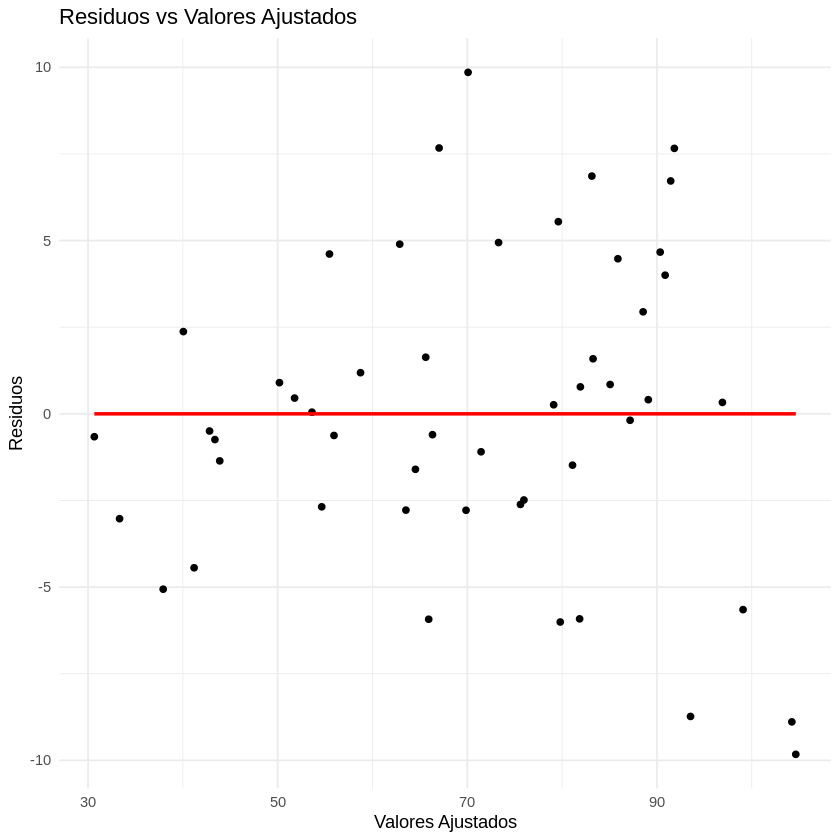

In [25]:
data1$residualsT2 <- residuals(modelT2)
data1$fittedT2 <- fitted(modelT2)

ggplot(data1, aes(x = fittedT2, y = residualsT2)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Residuos vs Valores Ajustados",
       x = "Valores Ajustados",
       y = "Residuos") +
  theme_minimal()

In [27]:
gqtest(modelT2, order.by = ~ sqrtcosts, data = data1, fraction = 10)


	Goldfeld-Quandt test

data:  modelT2
GQ = 3.2579, df1 = 18, df2 = 18, p-value = 0.008081
alternative hypothesis: variance increases from segment 1 to 2


In [28]:
data1$incosts <- 1 / (data1$costs)
data1$inrevenue <- 1 / (data1$revenue)
head(data1)

,costs,revenue,logcosts,logrevenue,residualsT1,fittedT1,sqrtcosts,sqrtrevenue,residualsT2,fittedT2,incosts,inrevenue
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,108.05,900,2.033625,2.954243,-0.008816084,2.963059,10.39471,30.00000,-0.6607939,30.66079,0.009254975,0.0011111111
2,123.98,918,2.093352,2.962843,-0.069220131,3.032063,11.13463,30.29851,-3.0257449,33.32426,0.008065817,0.0010893246
3,154.07,1080,2.187718,3.033424,-0.107663357,3.141087,12.41249,32.86335,-5.0607823,37.92414,0.006490556,0.0009259259
4,177.38,1350,2.248905,3.130334,-0.081444015,3.211778,13.31841,36.74235,-4.4427791,41.18513,0.005637614,0.0007407407
5,189.65,1791,2.277953,3.253096,0.007757580,3.245338,13.77135,42.32021,-0.4953439,42.81555,0.005272871,0.0005583473
6,169.10,1800,2.228144,3.255273,0.067480579,3.187792,13.00385,42.42641,2.3736024,40.05280,0.005913661,0.0005555556


In [29]:
modelT3 <- lm(inrevenue ~ incosts, data = data1)
modelT3


Call:
lm(formula = inrevenue ~ incosts, data = data1)

Coefficients:
(Intercept)      incosts  
 -7.315e-05    1.292e-01  


In [30]:
summary.lm(modelT3)


Call:
lm(formula = inrevenue ~ incosts, data = data1)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.356e-04 -2.591e-05  4.015e-06  1.512e-05  1.602e-04 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.315e-05  1.232e-05  -5.937 3.13e-07 ***
incosts      1.292e-01  3.741e-03  34.548  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.825e-05 on 48 degrees of freedom
Multiple R-squared:  0.9613,	Adjusted R-squared:  0.9605 
F-statistic:  1194 on 1 and 48 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


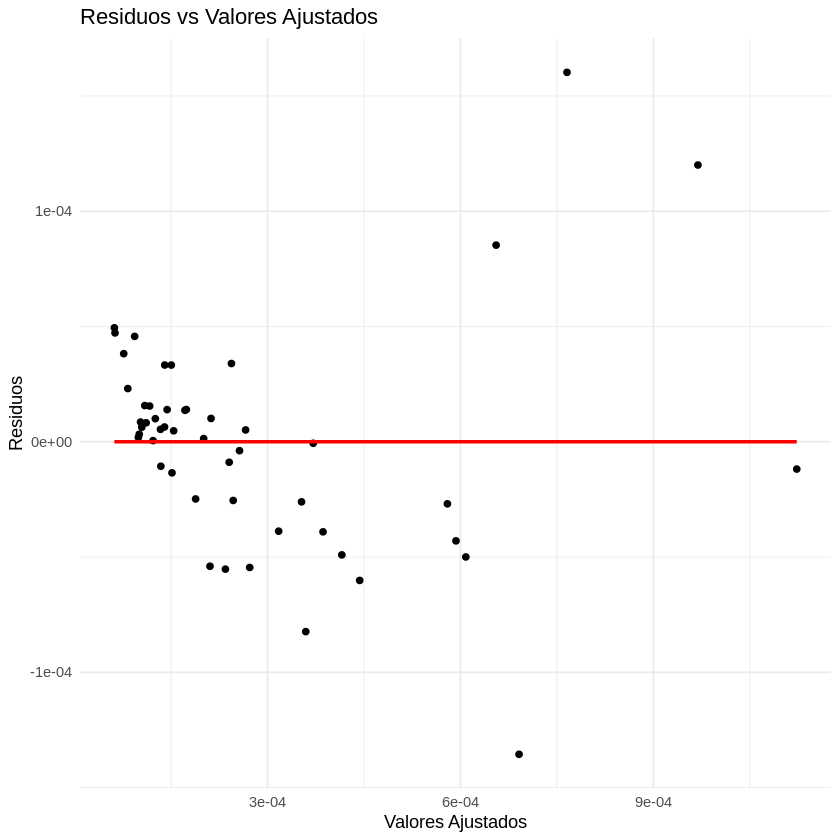

In [31]:
data1$residualsT3 <- residuals(modelT3)
data1$fittedT3 <- fitted(modelT3)

ggplot(data1, aes(x = fittedT3, y = residualsT3)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Residuos vs Valores Ajustados",
       x = "Valores Ajustados",
       y = "Residuos") +
  theme_minimal()

In [32]:
gqtest(modelT3, order.by = ~ incosts, data = data1, fraction = 10)


	Goldfeld-Quandt test

data:  modelT3
GQ = 18.376, df1 = 18, df2 = 18, p-value = 4.32e-08
alternative hypothesis: variance increases from segment 1 to 2
